<a href="https://colab.research.google.com/github/bhadreshamar/pcos/blob/main/BARCA_PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pt.1
Using symptoms to give a risk prediction on wheather a patient should visit a physician

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Aarnav/PCOS_data_infertility.csv')

In [ ]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
print(data['PCOS (Y/N)'].value_counts())

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


In [ ]:
print(data[' Age (yrs)'].value_counts())

 Age (yrs)
28    45
32    44
30    37
35    37
27    35
29    34
36    33
31    33
26    32
34    29
33    25
38    20
25    18
23    18
37    15
40    15
24    15
39     9
41     9
22     8
20     6
42     6
45     4
21     3
44     3
43     3
47     3
48     1
46     1
Name: count, dtype: int64


In [ ]:
print(data['Weight (Kg)'].value_counts())

Weight (Kg)
60.0    36
50.0    34
52.0    27
65.0    25
56.0    22
        ..
44.8     1
49.1     1
52.9     1
54.3     1
63.2     1
Name: count, Length: 117, dtype: int64


In [ ]:
print(data['Height(Cm) '].value_counts())

Height(Cm) 
158.000    67
152.000    66
150.000    46
154.000    38
155.000    27
161.000    24
160.000    24
162.000    21
156.000    21
153.000    19
165.000    17
148.000    17
159.000    16
163.000    14
164.000    13
157.000    13
158.496    11
151.000     9
170.000     6
145.000     6
164.592     5
149.000     5
146.000     4
161.544     4
168.000     4
173.000     3
164.500     3
147.000     3
155.448     3
171.000     2
170.688     2
172.000     2
169.000     2
152.400     2
166.000     2
167.640     2
144.000     2
143.000     2
167.000     2
142.000     2
161.500     1
137.000     1
180.000     1
164.400     1
173.700     1
158.400     1
167.700     1
153.400     1
140.000     1
146.304     1
Name: count, dtype: int64


In [ ]:
print(data['BMI'].value_counts())

BMI
26.0    10
24.0     8
24.4     8
25.1     7
23.1     7
        ..
27.9     1
24.9     1
16.9     1
15.1     1
33.5     1
Name: count, Length: 355, dtype: int64


In [ ]:
print(data['Blood Group'].value_counts())
if

Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


In [ ]:
print(data['Pulse rate(bpm) '].value_counts())

Pulse rate(bpm) 
72    273
74    101
78     60
70     45
80     29
73     17
75      7
76      4
82      3
18      1
13      1
Name: count, dtype: int64


In [ ]:
print(data['RR (breaths/min)'].value_counts())

RR (breaths/min)
18    271
20    185
22     58
16     12
24     11
28      2
26      1
19      1
Name: count, dtype: int64


In [ ]:
print(data['Hb(g/dl)'].value_counts())

Hb(g/dl)
11.00    62
10.80    60
10.50    44
12.00    43
10.00    40
11.20    36
11.50    35
10.20    35
11.10    22
10.70    21
12.50    17
11.80    13
12.10    12
11.70    11
12.40    11
10.60     9
10.40     7
12.80     7
13.20     7
10.30     5
11.40     4
11.90     4
13.80     3
9.40      3
14.00     2
12.70     2
12.60     2
13.40     2
10.10     2
12.20     2
12.30     2
11.30     2
10.48     1
9.50      1
10.90     1
12.90     1
11.60     1
8.50      1
12.01     1
10.09     1
13.30     1
14.20     1
14.80     1
9.00      1
13.00     1
9.80      1
Name: count, dtype: int64


In [ ]:
print(data['Cycle(R/I)'].value_counts())

Cycle(R/I)
2    390
4    150
5      1
Name: count, dtype: int64


In [ ]:
print(data['Cycle length(days)'].value_counts())

Cycle length(days)
5     276
6      91
4      61
2      38
3      36
7      19
9       9
11      5
12      2
8       2
0       1
10      1
Name: count, dtype: int64


In [ ]:
print(data['Marraige Status (Yrs)'].value_counts())

Marraige Status (Yrs)
4.0     52
3.0     51
8.0     48
5.0     47
10.0    44
7.0     43
6.0     38
2.0     29
12.0    29
13.0    24
9.0     17
11.0    16
15.0    14
1.0     13
14.0    12
16.0     8
2.5      7
3.5      7
18.0     7
17.0     6
1.5      5
6.5      4
20.0     2
19.0     2
4.5      2
22.0     2
25.0     2
30.0     2
23.0     2
0.0      1
8.5      1
7.5      1
24.0     1
2.2      1
Name: count, dtype: int64


In [ ]:
print(data['Pregnant(Y/N)'].value_counts())

Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


In [ ]:
print(data['No. of aborptions'].value_counts())

No. of aborptions
0    437
1     69
2     22
3     10
4      2
5      1
Name: count, dtype: int64


In [ ]:
print(data['  I   beta-HCG(mIU/mL)'].value_counts())

  I   beta-HCG(mIU/mL)
1.99      191
10.00      11
2.00        7
15.00       4
1.97        3
         ... 
2.58        1
896.60      1
323.00      1
1.30        1
122.58      1
Name: count, Length: 307, dtype: int64


In [ ]:
print(data['II    beta-HCG(mIU/mL)'].value_counts())

II    beta-HCG(mIU/mL)
1.99      307
2           8
15          6
12          6
20          3
         ... 
168.99      1
237.5       1
10.24       1
104.87      1
5.81        1
Name: count, Length: 203, dtype: int64


In [ ]:
print(data['FSH(mIU/mL)'].value_counts())

FSH(mIU/mL)
5.71     6
4.96     5
3.99     5
1.00     5
5.01     5
        ..
7.06     1
10.06    1
2.02     1
6.05     1
1.89     1
Name: count, Length: 371, dtype: int64


In [ ]:
print(data['LH(mIU/mL)'].value_counts())

LH(mIU/mL)
1.97    5
0.20    5
2.30    5
0.10    5
1.00    5
       ..
3.97    1
3.28    1
3.02    1
4.33    1
0.31    1
Name: count, Length: 342, dtype: int64


In [ ]:
print(data['FSH/LH'].value_counts())

FSH/LH
6.000000    3
2.769231    2
2.228700    2
2.009804    2
0.435252    2
           ..
7.823529    1
2.304478    1
1.912214    1
0.803636    1
2.863354    1
Name: count, Length: 512, dtype: int64


In [ ]:
print(data['Hip(inch)'].value_counts())

Hip(inch)
38    106
36     65
39     57
40     52
42     49
37     33
34     31
32     23
35     21
44     20
45     17
30     15
41     14
28     11
46      9
33      7
48      7
26      3
43      1
Name: count, dtype: int64


In [ ]:
print(data['Waist(inch)'].value_counts())

In [ ]:
print(data['Waist:Hip Ratio'].value_counts())

Waist:Hip Ratio
0.888889    29
0.921053    28
0.894737    27
0.842105    20
0.857143    19
            ..
0.976190     1
0.968750     1
0.913043     1
0.966667     1
0.977273     1
Name: count, Length: 96, dtype: int64


In [ ]:
print(data['TSH (mIU/L)'].value_counts())

TSH (mIU/L)
5.00    18
1.00     9
1.51     7
2.08     5
2.78     5
        ..
6.65     1
6.66     1
2.19     1
2.91     1
3.08     1
Name: count, Length: 308, dtype: int64


In [ ]:
print(data['TSH (mIU/L)'].value_counts())

TSH (mIU/L)
5.00    18
1.00     9
1.51     7
2.08     5
2.78     5
        ..
6.65     1
6.66     1
2.19     1
2.91     1
3.08     1
Name: count, Length: 308, dtype: int64


In [ ]:
print(data['AMH(ng/mL)'].value_counts())

AMH(ng/mL)
2.5     9
1       9
4.5     7
6       6
1.2     6
       ..
0.29    1
5.67    1
3.63    1
3.49    1
18.4    1
Name: count, Length: 301, dtype: int64


In [ ]:
print(data['PRL(ng/mL)'].value_counts())

PRL(ng/mL)
25.04    3
8.10     3
12.11    3
19.31    2
7.49     2
        ..
26.64    1
13.56    1
18.06    1
8.21     1
10.78    1
Name: count, Length: 481, dtype: int64


In [ ]:
print(data['Vit D3 (ng/mL)'].value_counts())

Vit D3 (ng/mL)
18.7    6
25.6    5
22.7    5
24.3    5
23.4    5
       ..
32.0    1
12.7    1
31.0    1
26.9    1
23.0    1
Name: count, Length: 331, dtype: int64


In [ ]:
print(data['PRG(ng/mL)'].value_counts())

PRG(ng/mL)
0.25     172
0.30      31
0.40      20
0.35      18
0.38      15
        ... 
25.30      1
0.61       1
0.22       1
0.69       1
0.23       1
Name: count, Length: 89, dtype: int64


In [ ]:
print(data['RBS(mg/dl)'].value_counts())

RBS(mg/dl)
100.0    112
92.0     106
91.0      24
108.0     22
93.0      20
116.0     19
85.0      19
84.0      18
115.0     18
80.0      16
107.0     15
110.0     15
125.0      9
95.0       8
120.0      7
82.0       7
130.0      7
90.0       7
106.0      7
86.0       7
133.0      5
98.0       5
138.0      5
94.0       5
88.0       4
102.0      4
70.0       4
72.0       3
140.0      3
76.0       3
123.0      3
112.0      3
87.0       3
146.0      2
105.0      2
83.0       2
77.0       2
160.0      2
73.0       2
75.0       1
127.0      1
109.0      1
97.0       1
104.0      1
60.0       1
131.0      1
83.2       1
350.0      1
134.0      1
113.0      1
122.0      1
79.0       1
135.0      1
225.0      1
103.0      1
Name: count, dtype: int64


In [ ]:
print(data['Weight gain(Y/N)'].value_counts())

Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


In [ ]:
print(data['hair growth(Y/N)'].value_counts())

hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


In [ ]:
print(data['Skin darkening (Y/N)'].value_counts())

Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


In [ ]:
print(data['Hair loss(Y/N)'].value_counts())

Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


In [ ]:
print(data['Pimples(Y/N)'].value_counts())

Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


In [ ]:
print(data['Fast food (Y/N)'].value_counts())

Fast food (Y/N)
1.0    278
0.0    262
Name: count, dtype: int64


In [ ]:
print(data['Reg.Exercise(Y/N)'].value_counts())

Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


In [ ]:
print(data['BP _Systolic (mmHg)'].value_counts())

BP _Systolic (mmHg)
110    264
120    253
100     13
130      8
140      2
12       1
Name: count, dtype: int64


In [ ]:
print(data['BP _Diastolic (mmHg)'].value_counts())

BP _Diastolic (mmHg)
80     379
70     159
60       1
8        1
100      1
Name: count, dtype: int64


In [ ]:
print(data['Follicle No. (L)'].value_counts())

Follicle No. (L)
3     61
1     59
6     54
4     53
5     52
2     42
7     38
8     35
9     27
10    26
12    23
11    17
14    13
0     10
13     9
15     6
16     6
18     4
21     3
20     2
22     1
Name: count, dtype: int64


In [ ]:
print(data['Follicle No. (R)'].value_counts())

Follicle No. (R)
5     57
7     55
2     54
3     49
4     46
1     41
10    40
6     36
12    30
9     29
8     23
11    18
15    13
0     11
14    10
16     7
13     7
20     6
18     5
19     4
Name: count, dtype: int64


In [ ]:
print(data['Avg. F size (L) (mm)'].value_counts())

Avg. F size (L) (mm)
15.0    76
18.0    69
14.0    60
16.0    52
19.0    48
17.0    47
13.0    38
12.0    31
10.0    28
11.0    26
20.0    21
0.0      7
21.0     7
8.0      5
9.5      3
17.5     3
22.0     2
9.0      2
10.5     2
18.5     2
7.0      2
6.5      1
14.5     1
15.5     1
5.0      1
11.5     1
7.5      1
2.0      1
12.5     1
24.0     1
6.8      1
Name: count, dtype: int64


In [ ]:
print(data['Avg. F size (R) (mm)'].value_counts())

Avg. F size (R) (mm)
18.00    84
15.00    61
17.00    57
14.00    52
19.00    51
16.00    50
12.00    44
13.00    39
20.00    26
11.00    25
10.00    11
21.00    10
9.00      6
7.00      3
8.50      2
17.50     2
22.00     2
6.00      2
8.00      1
13.50     1
5.00      1
6.20      1
4.50      1
4.70      1
0.00      1
10.50     1
5.80      1
11.50     1
24.00     1
0.17      1
16.50     1
23.00     1
Name: count, dtype: int64


In [ ]:
print(data['Endometrium (mm)'].value_counts())

Endometrium (mm)
9.00     52
8.00     46
7.00     37
10.00    35
11.00    27
         ..
10.35     1
6.60      1
14.20     1
9.10      1
6.90      1
Name: count, Length: 91, dtype: int64


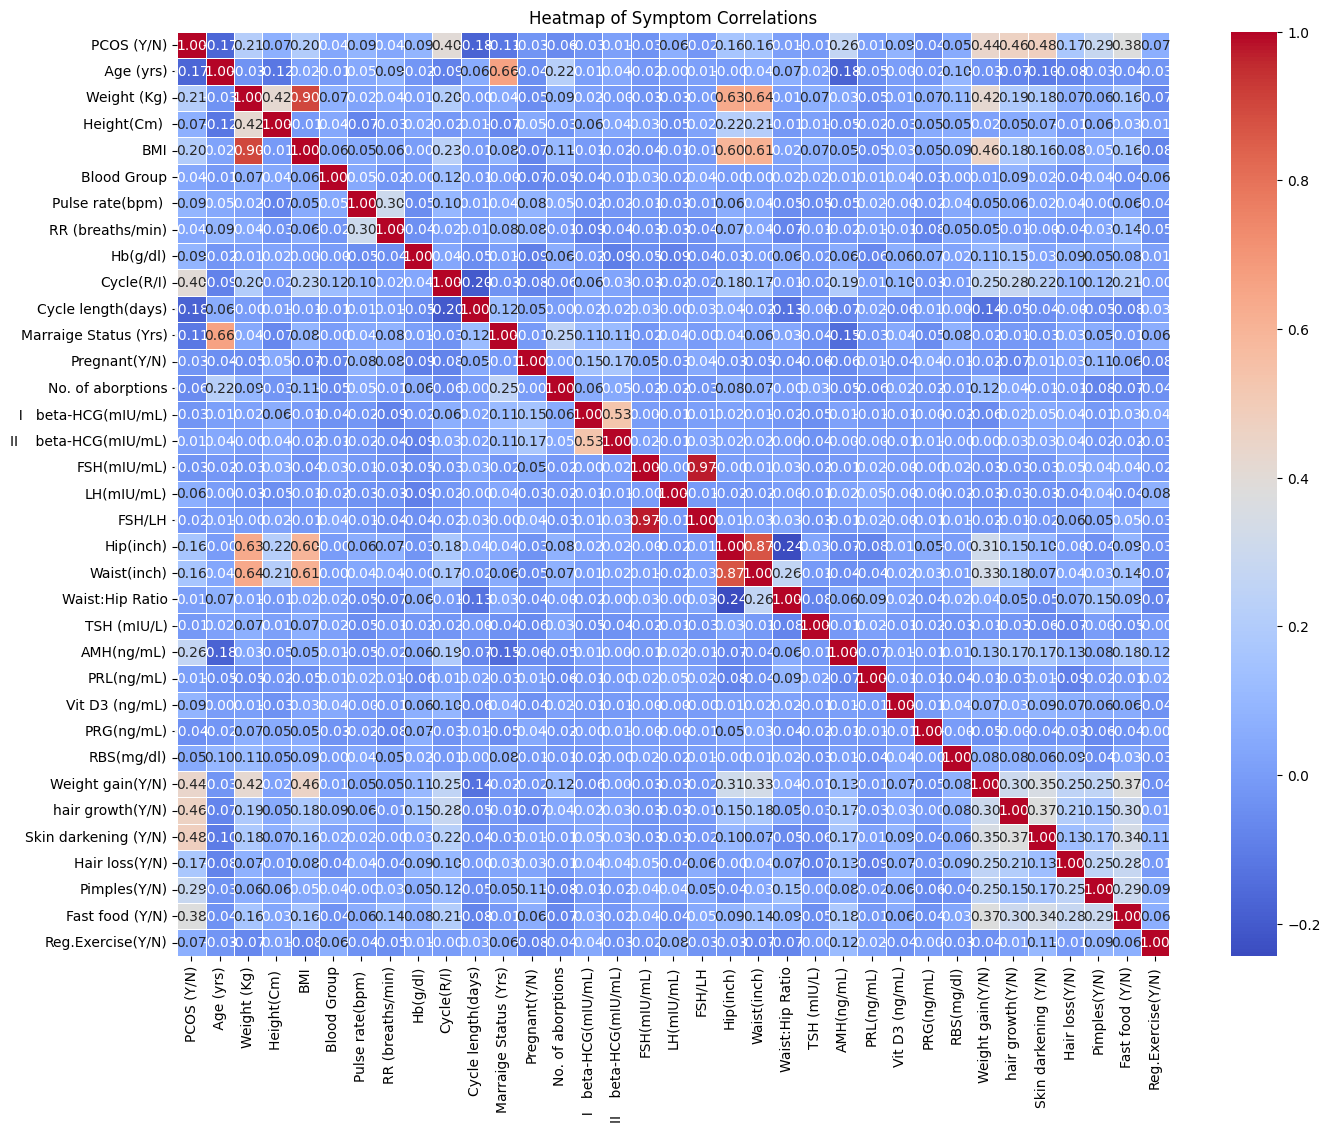

In [ ]:
# prompt: Create a heat map of all the symptoms listed above

import matplotlib.pyplot as plt

# Select columns to keep for the heatmap
columns_to_keep = [
    'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
    'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
    'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
    'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
    'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
    'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
    'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]
data_heatmap = data[columns_to_keep].copy()


# Convert relevant columns to numeric, coercing errors to NaN
data_heatmap['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data_heatmap['II    beta-HCG(mIU/mL)'], errors='coerce')
data_heatmap['AMH(ng/mL)'] = pd.to_numeric(data_heatmap['AMH(ng/mL)'], errors='coerce')


# Calculate the correlation matrix
correlation_matrix = data_heatmap.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Symptom Correlations')
plt.show()

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Aarnav/PCOS_data_infertility.csv')
data.columns = data.columns.str.strip()
X = data.drop(["PCOS (Y/N)"], axis=1)
y = data["PCOS (Y/N)"]

# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. If not, diagnose the error.

## Handle missing values

### Subtask:
Identify and address any missing values in the dataset.


**Reasoning**:
Check for missing values in the `data` DataFrame.



In [ ]:
print(data.isnull().sum())

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
Age (yrs)                   0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
I   beta-HCG(mIU/mL)        0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

**Reasoning**:
Handle the missing values in the identified columns by dropping the 'Unnamed: 44' column due to a large number of missing values and imputing the missing values in 'Marraige Status (Yrs)' and 'Fast food (Y/N)' with the mode.



In [ ]:
data = data.drop('Unnamed: 44', axis=1)
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)').mode()[0], inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)').mode()[0], inplace=True)
print(data.isnull().sum())

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (ipython-input-175-3012446663.py, line 2)

**Reasoning**:
Correct the syntax error in the previous code block and re-run the code to handle the missing values and verify the result.



In [ ]:
data = data.drop('Unnamed: 44', axis=1)
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mode()[0], inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mode()[0], inplace=True)
print(data.isnull().sum())

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

## Encode categorical features

### Subtask:
Convert categorical variables into a numerical format suitable for machine learning models.


**Reasoning**:
Identify and one-hot encode the categorical columns in the `X` DataFrame, then drop the original columns.



In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
display(X.head())

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,AMH(ng/mL)_8.9,AMH(ng/mL)_8.98,AMH(ng/mL)_9,AMH(ng/mL)_9.1,AMH(ng/mL)_9.2,AMH(ng/mL)_9.7,AMH(ng/mL)_9.8,AMH(ng/mL)_9.9,AMH(ng/mL)_a,Unnamed: 44_7
0,1,1,28,44.6,152.0,19.300000,15,78,22,10.48,...,False,False,False,False,False,False,False,False,False,False
1,2,2,36,65.0,161.5,24.921163,15,74,20,11.70,...,False,False,False,False,False,False,False,False,False,False
2,3,3,33,68.8,165.0,25.270891,11,72,18,11.80,...,False,False,False,False,False,False,False,False,False,False
3,4,4,37,65.0,148.0,29.674945,13,72,20,12.00,...,False,False,False,False,False,False,False,False,False,False
4,5,5,25,52.0,161.0,20.060954,11,72,18,10.00,...,False,False,False,False,False,False,False,False,False,False


## Scale numerical features

### Subtask:
Standardize or normalize numerical features to ensure they have a similar scale.


**Reasoning**:
Identify numerical columns, instantiate StandardScaler, and apply scaling to the numerical columns of X.



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Impute missing values after scaling but before splitting
X['Marraige Status (Yrs)'].fillna(X['Marraige Status (Yrs)'].mode()[0], inplace=True)
X['Fast food (Y/N)'].fillna(X['Fast food (Y/N)'].mode()[0], inplace=True)

display(X.head())

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,AMH(ng/mL)_8.9,AMH(ng/mL)_8.98,AMH(ng/mL)_9,AMH(ng/mL)_9.1,AMH(ng/mL)_9.2,AMH(ng/mL)_9.7,AMH(ng/mL)_9.8,AMH(ng/mL)_9.9,AMH(ng/mL)_a,Unnamed: 44_7
0,-1.728852,-1.728852,-0.634606,-1.364770,-0.744005,-1.236546,0.651284,1.073680,1.633608,-0.785169,...,False,False,False,False,False,False,False,False,False,False
1,-1.722449,-1.722449,0.845230,0.486731,0.831983,0.150489,0.651284,0.169968,0.448119,0.623440,...,False,False,False,False,False,False,False,False,False,False
2,-1.716046,-1.716046,0.290291,0.831618,1.412610,0.236785,-1.523682,-0.281888,-0.737370,0.738900,...,False,False,False,False,False,False,False,False,False,False
3,-1.709643,-1.709643,1.030210,0.486731,-1.407579,1.323495,-0.436199,-0.281888,0.448119,0.969819,...,False,False,False,False,False,False,False,False,False,False
4,-1.703240,-1.703240,-1.189545,-0.693147,0.749036,-1.048778,-1.523682,-0.281888,-0.737370,-1.339375,...,False,False,False,False,False,False,False,False,False,False


## Split data

### Subtask:
Divide the dataset into training and testing sets.


**Reasoning**:
Divide the dataset into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X=data.loc[:,data.columns!='PCOS (Y/N)'].copy()
y=data['PCOS (Y/N)']

# Identify and one-hot encode the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Impute missing values after one-hot encoding
for col in ['Marraige Status (Yrs)', 'Fast food (Y/N)']:
    if col in X.columns:
        if X[col].isnull().any():
            X[col].fillna(X[col].mode()[0], inplace=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((432, 543), (109, 543), (432,), (109,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Define the models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training and evaluating {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 30)) # Separator line

--- Training and evaluating Logistic Regression ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        77
           1       0.96      0.78      0.86        32

    accuracy                           0.93       109
   macro avg       0.94      0.88      0.91       109
weighted avg       0.93      0.93      0.92       109

-------------------------------------------------
--- Training and evaluating Support Vector Machine ---
              precision    recall  f1-score   support

           0       0.83      0.99      0.90        77
           1       0.94      0.50      0.65        32

    accuracy                           0.84       109
   macro avg       0.88      0.74      0.78       109
weighted avg       0.86      0.84      0.83       109

----------------------------------------------------
--- Training and evaluating Naive Bayes ---
              precision    recall  f1-score   support

           0       0.76      0.42    

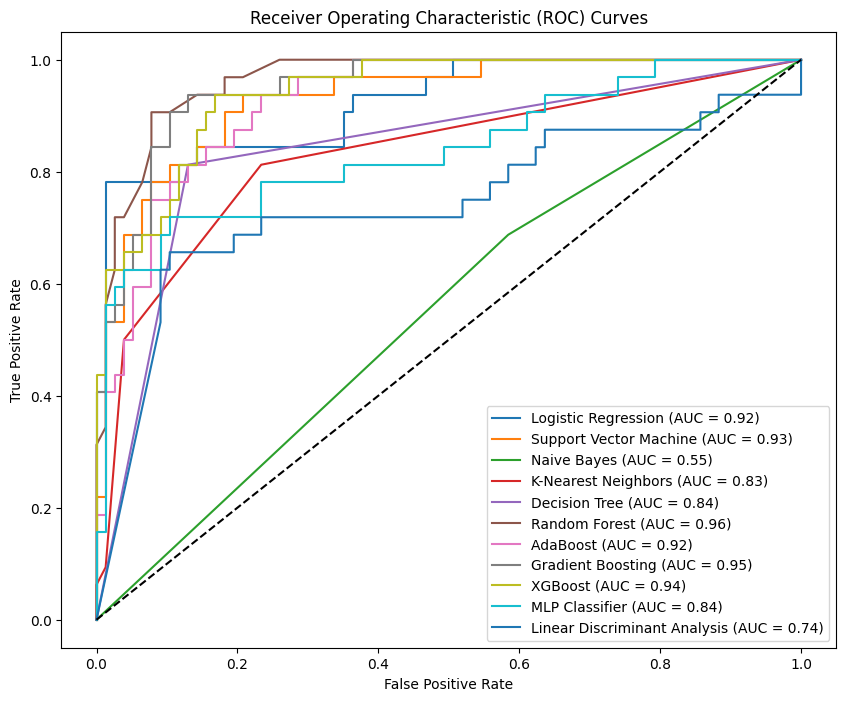

In [ ]:
# prompt: Create ROC curves

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_scaled)
    else:
        print(f"Model {name} does not support probability prediction.")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


--- Confusion Matrix for Logistic Regression ---


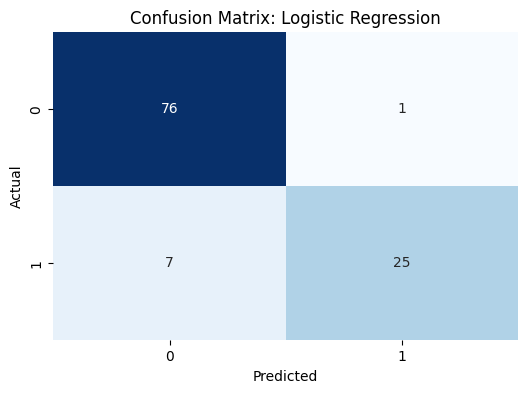

-------------------------------------------------
--- Confusion Matrix for Support Vector Machine ---


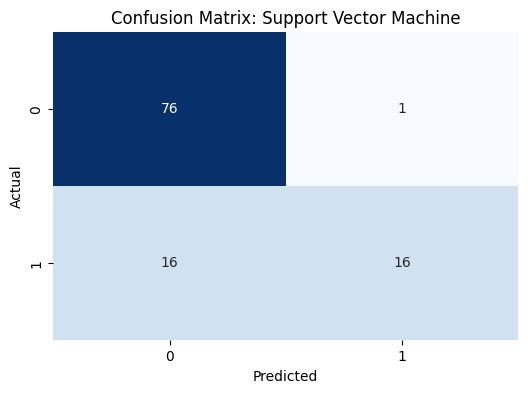

----------------------------------------------------
--- Confusion Matrix for Naive Bayes ---


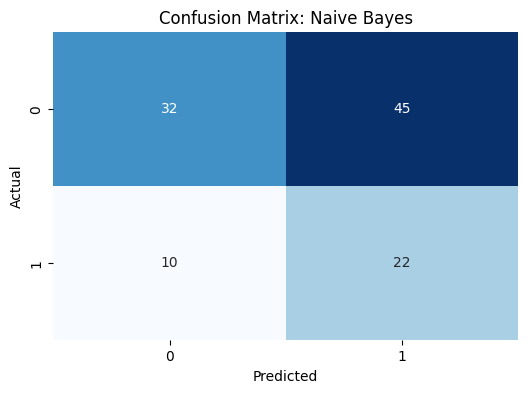

-----------------------------------------
--- Confusion Matrix for K-Nearest Neighbors ---


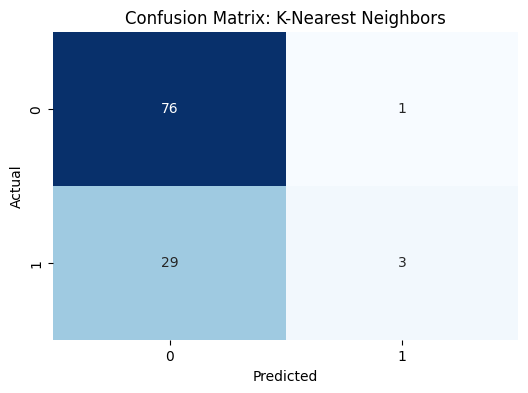

-------------------------------------------------
--- Confusion Matrix for Decision Tree ---


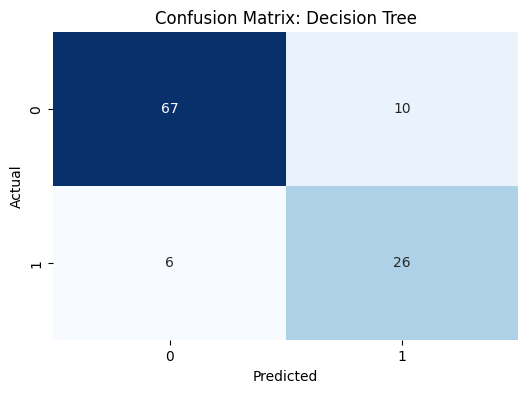

-------------------------------------------
--- Confusion Matrix for Random Forest ---


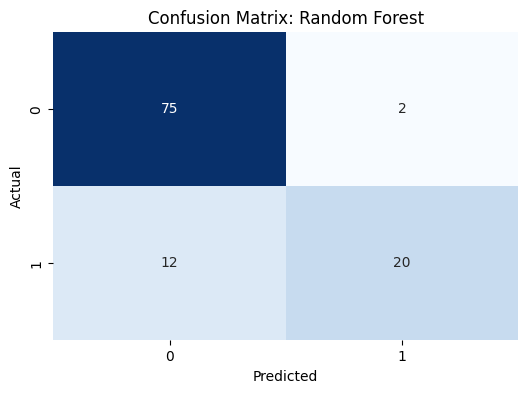

-------------------------------------------
--- Confusion Matrix for AdaBoost ---


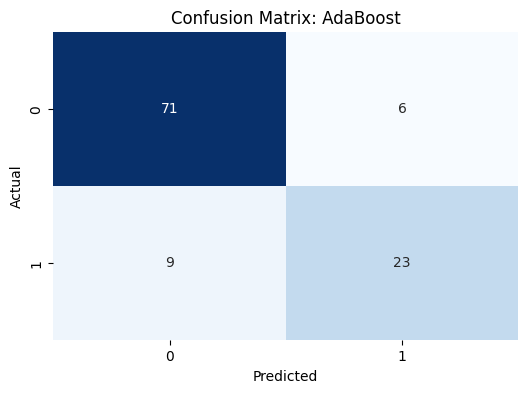

--------------------------------------
--- Confusion Matrix for Gradient Boosting ---


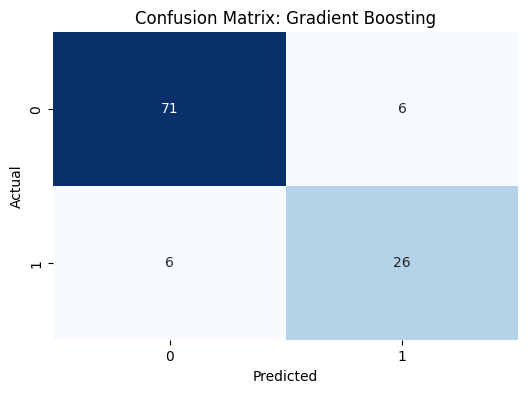

-----------------------------------------------
--- Confusion Matrix for XGBoost ---


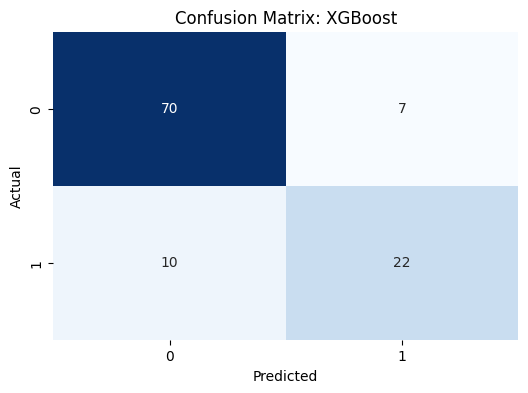

-------------------------------------
--- Confusion Matrix for MLP Classifier ---


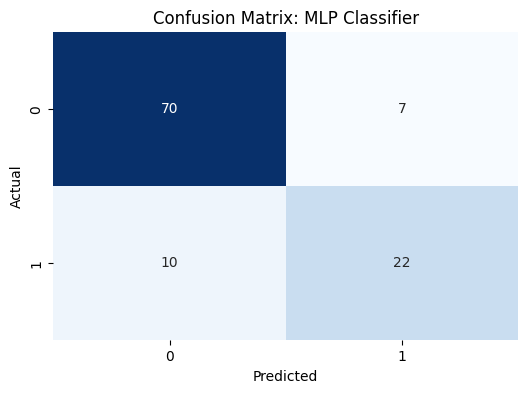

--------------------------------------------
--- Confusion Matrix for Linear Discriminant Analysis ---


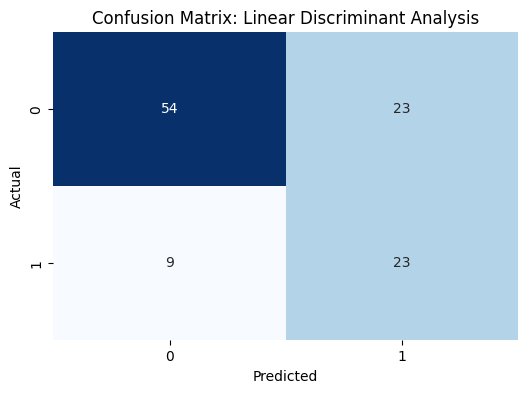

----------------------------------------------------------


In [ ]:
# prompt: Create confusion matrices for each model

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    print(f"--- Confusion Matrix for {name} ---")
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * (len(name) + 30))


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5212 - loss: 0.8738 - val_accuracy: 0.5287 - val_loss: 0.7646
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5863 - loss: 0.7965 - val_accuracy: 0.5747 - val_loss: 0.7654
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5657 - loss: 0.7713 - val_accuracy: 0.5862 - val_loss: 0.7697
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6098 - loss: 0.6772 - val_accuracy: 0.5862 - val_loss: 0.7770
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6171 - loss: 0.6908 - val_accuracy: 0.6207 - val_loss: 0.7860
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6604 - loss: 0.6225 - val_accuracy: 0.6092 - val_loss: 0.7977
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6744 - loss: 0.5796 - val_accuracy: 0.6092 - val_loss: 0.8142
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7122 - loss: 0.5205 - val_accuracy: 0.5862 - val_loss:

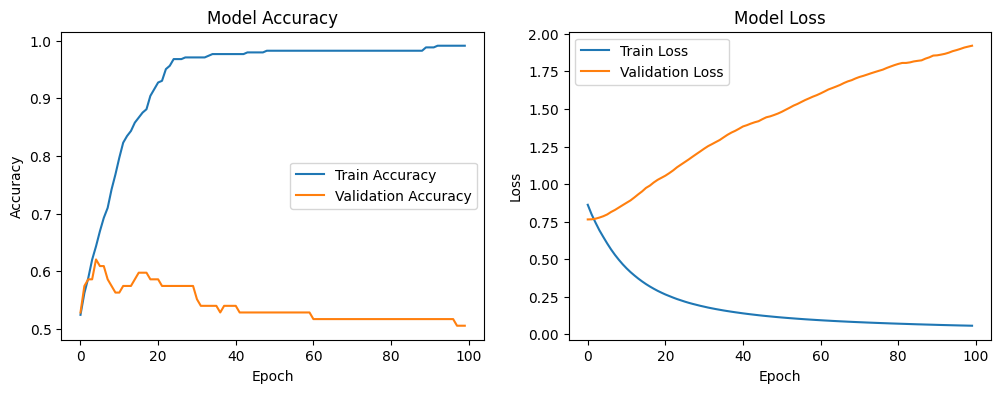

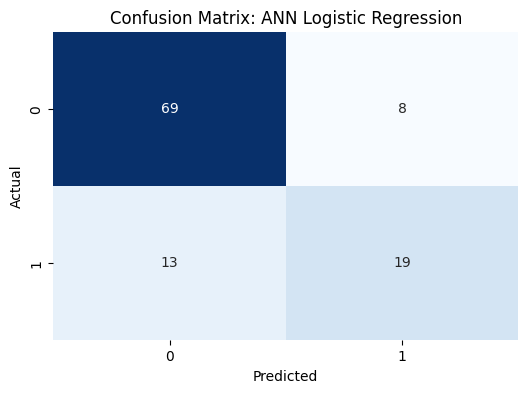

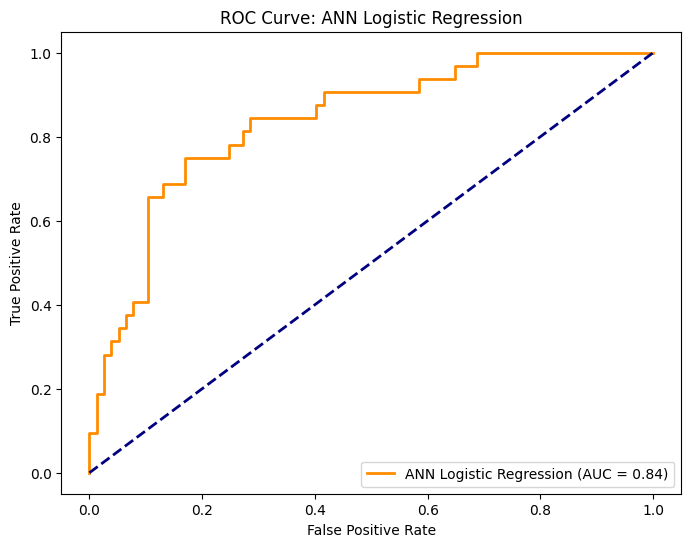

In [ ]:
# prompt: Now I want to build an ANN(Artifical Neural Network) for Logistic Regression, 100 Epochs, batch size 42

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are already loaded and preprocessed as in the previous code

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model for Logistic Regression
# A single output neuron with a sigmoid activation is used for binary classification (Logistic Regression)
model_ann_lr = keras.Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])

# Compile the model
# Using BinaryCrossentropy loss for binary classification and Adam optimizer
model_ann_lr.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model
epochs = 100
batch_size = 42

history = model_ann_lr.fit(X_train_scaled, y_train,
                           epochs=epochs,
                           batch_size=batch_size,
                           validation_split=0.2, # Using a validation split during training
                           verbose=1)

# Evaluate the model
loss, accuracy = model_ann_lr.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nANN Logistic Regression - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Generate classification report
y_pred_prob = model_ann_lr.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nANN Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm_ann_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: ANN Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_ann_lr, tpr_ann_lr, _ = roc_curve(y_test, y_pred_prob)
roc_auc_ann_lr = auc(fpr_ann_lr, tpr_ann_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann_lr, tpr_ann_lr, color='darkorange', lw=2, label=f'ANN Logistic Regression (AUC = {roc_auc_ann_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN Logistic Regression')
plt.legend(loc="lower right")
plt.show()



--- Training ANN for Gradient Boosting ---
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5138 - loss: 0.8287 - val_accuracy: 0.6092 - val_loss: 0.6376
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6389 - loss: 0.6487 - val_accuracy: 0.6667 - val_loss: 0.6024
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6630 - loss: 0.6423 - val_accuracy: 0.6667 - val_loss: 0.5832
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7671 - loss: 0.5212 - val_accuracy: 0.7241 - val_loss: 0.5637
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7781 - loss: 0.4935 - val_accuracy: 0.7241 - val_loss: 0.5464
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8133 - loss: 0.4440 - val_accuracy: 0.7471 - val_loss: 0.5275
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8186 - loss: 0.4042 - val_accuracy: 0.7701 - val_loss: 0.5101
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8692 - los

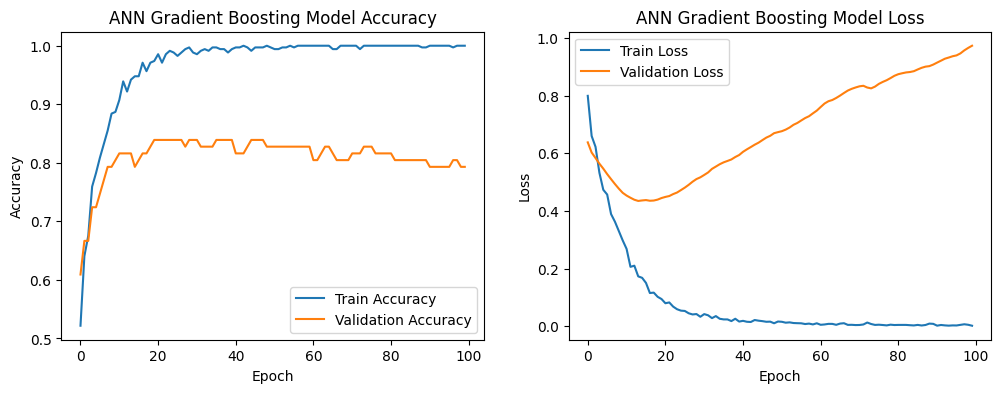

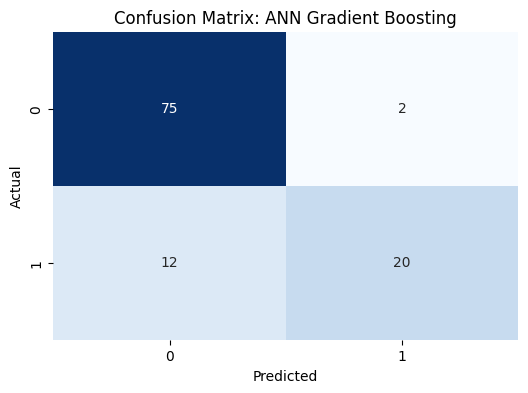

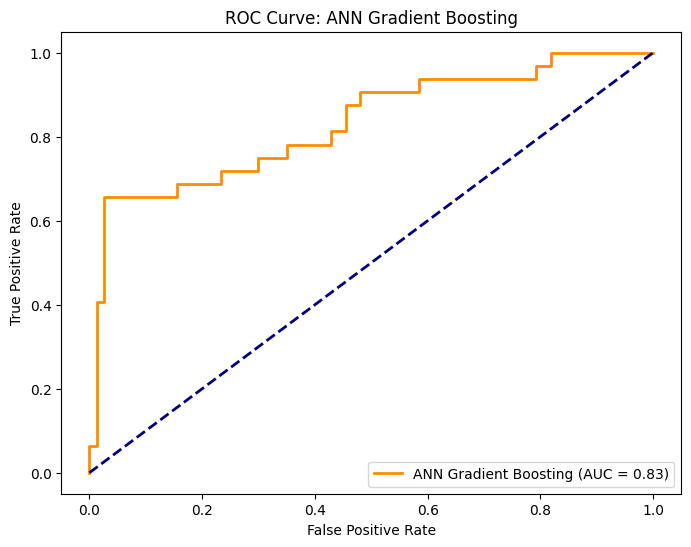

In [ ]:
# prompt: Now I want to build an ANN(Artifical Neural Network) for Gradient Boosting, 100 Epochs, batch size 42

import matplotlib.pyplot as plt
# Build the ANN model for Gradient Boosting
# This architecture is a simple feed-forward network
model_ann_gb = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.3),  # Adding dropout for regularization
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
# Using BinaryCrossentropy loss and Adam optimizer
model_ann_gb.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Define the number of epochs and batch size
epochs = 100
batch_size = 42

# Train the model
print("\n--- Training ANN for Gradient Boosting ---")
history_ann_gb = model_ann_gb.fit(X_train_scaled, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.2, # Using a validation split during training
                                  verbose=1)

# Evaluate the model
loss_ann_gb, accuracy_ann_gb = model_ann_gb.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nANN Gradient Boosting - Test Loss: {loss_ann_gb:.4f}, Test Accuracy: {accuracy_ann_gb:.4f}')

# Generate classification report
y_pred_prob_ann_gb = model_ann_gb.predict(X_test_scaled)
y_pred_ann_gb = (y_pred_prob_ann_gb > 0.5).astype(int)
print("\nANN Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_ann_gb))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ann_gb.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann_gb.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Gradient Boosting Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ann_gb.history['loss'], label='Train Loss')
plt.plot(history_ann_gb.history['val_loss'], label='Validation Loss')
plt.title('ANN Gradient Boosting Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm_ann_gb = confusion_matrix(y_test, y_pred_ann_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: ANN Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_ann_gb, tpr_ann_gb, _ = roc_curve(y_test, y_pred_prob_ann_gb)
roc_auc_ann_gb = auc(fpr_ann_gb, tpr_ann_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann_gb, tpr_ann_gb, color='darkorange', lw=2, label=f'ANN Gradient Boosting (AUC = {roc_auc_ann_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN Gradient Boosting')
plt.legend(loc="lower right")
plt.show()



--- Training ANN for Random Forest ---
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5951 - loss: 0.7810 - val_accuracy: 0.6552 - val_loss: 0.6710
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6380 - loss: 0.6464 - val_accuracy: 0.6667 - val_loss: 0.6457
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7022 - loss: 0.6306 - val_accuracy: 0.7471 - val_loss: 0.6272
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7167 - loss: 0.5795 - val_accuracy: 0.7471 - val_loss: 0.6099
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7259 - loss: 0.5534 - val_accuracy: 0.7241 - val_loss: 0.5949
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7538 - loss: 0.4986 - val_accuracy: 0.7356 - val_loss: 0.5698
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7007 - loss: 0.5194 - val_accuracy: 0.7471 - val_loss: 0.5517
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7979 - loss: 0

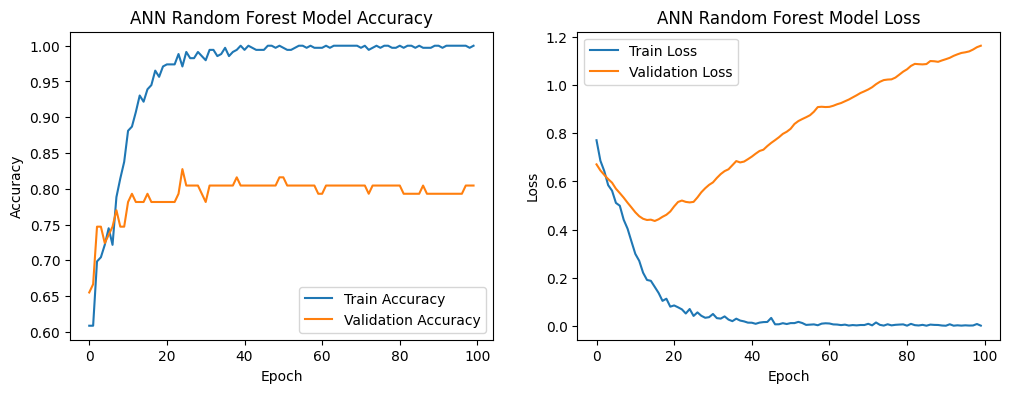

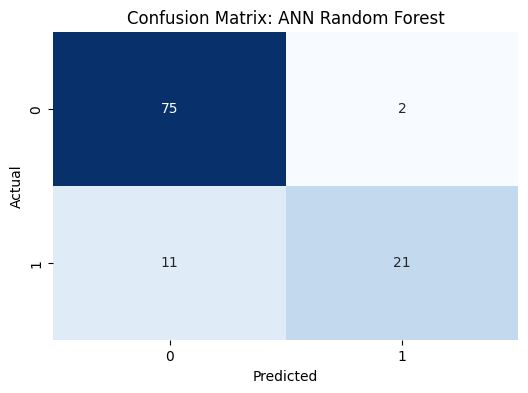

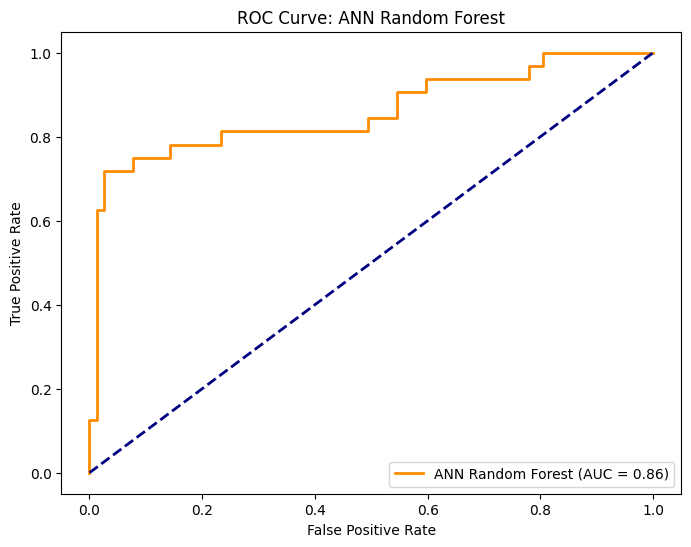

In [ ]:
# prompt: Now I want to build an ANN(Artifical Neural Network) for Random Forest, 100 Epochs, batch size 42

import matplotlib.pyplot as plt
# Build the ANN model for Random Forest
# This architecture is a simple feed-forward network tailored for the dataset
model_ann_rf = keras.Sequential([
    # Input layer and first hidden layer
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.4), # Adding dropout for regularization

    # Second hidden layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),

    # Third hidden layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),

    # Output layer for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
# Using BinaryCrossentropy loss and Adam optimizer
model_ann_rf.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Define the number of epochs and batch size
epochs = 100
batch_size = 42

# Train the model
print("\n--- Training ANN for Random Forest ---")
history_ann_rf = model_ann_rf.fit(X_train_scaled, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.2, # Using a validation split during training
                                  verbose=1)

# Evaluate the model
loss_ann_rf, accuracy_ann_rf = model_ann_rf.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nANN Random Forest - Test Loss: {loss_ann_rf:.4f}, Test Accuracy: {accuracy_ann_rf:.4f}')

# Generate classification report
y_pred_prob_ann_rf = model_ann_rf.predict(X_test_scaled)
y_pred_ann_rf = (y_pred_prob_ann_rf > 0.5).astype(int)
print("\nANN Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_ann_rf))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ann_rf.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann_rf.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Random Forest Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ann_rf.history['loss'], label='Train Loss')
plt.plot(history_ann_rf.history['val_loss'], label='Validation Loss')
plt.title('ANN Random Forest Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm_ann_rf = confusion_matrix(y_test, y_pred_ann_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: ANN Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_ann_rf, tpr_ann_rf, _ = roc_curve(y_test, y_pred_prob_ann_rf)
roc_auc_ann_rf = auc(fpr_ann_rf, tpr_ann_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann_rf, tpr_ann_rf, color='darkorange', lw=2, label=f'ANN Random Forest (AUC = {roc_auc_ann_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN Random Forest')
plt.legend(loc="lower right")
plt.show()



--- Training ANN for AdaBoost ---
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.4806 - loss: 0.7823 - val_accuracy: 0.5862 - val_loss: 0.6455
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5869 - loss: 0.6940 - val_accuracy: 0.6437 - val_loss: 0.6333
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6752 - loss: 0.6671 - val_accuracy: 0.6552 - val_loss: 0.6154
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6769 - loss: 0.6042 - val_accuracy: 0.6782 - val_loss: 0.5975
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6742 - loss: 0.5866 - val_accuracy: 0.6552 - val_loss: 0.5790
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7003 - loss: 0.5815 - val_accuracy: 0.6437 - val_loss: 0.5589
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7207 - loss: 0.5699 - val_accuracy: 0.7126 - val_loss: 0.5372
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7444 - loss: 0.5027

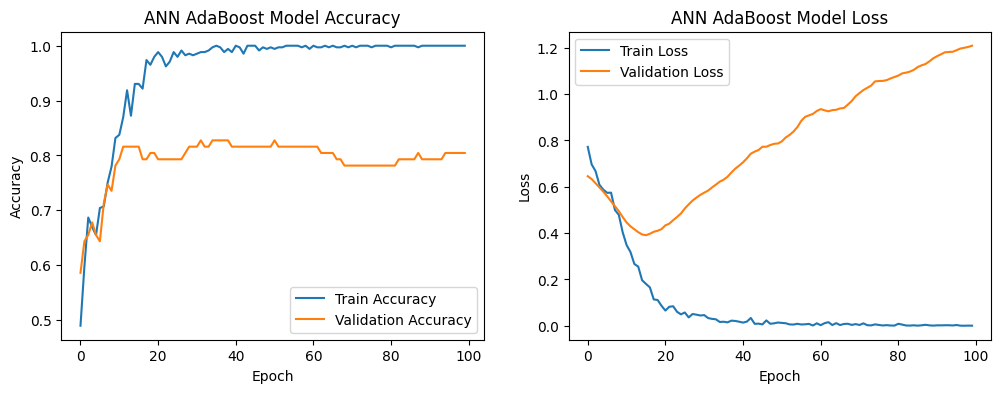

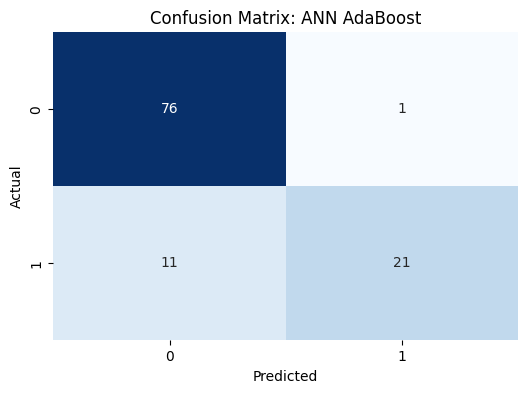

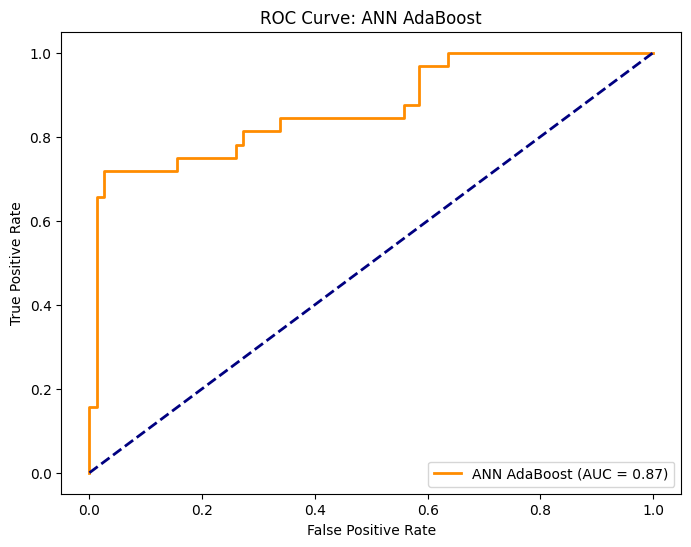

In [ ]:
# prompt: Now I want to build an ANN(Artifical Neural Network) for AdaBoost, 100 Epochs, batch size 42

import matplotlib.pyplot as plt
# Build the ANN model for AdaBoost
# This architecture is a simple feed-forward network tailored for the dataset
model_ann_ab = keras.Sequential([
    # Input layer and first hidden layer
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.4), # Adding dropout for regularization

    # Second hidden layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),

    # Third hidden layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),

    # Output layer for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
# Using BinaryCrossentropy loss and Adam optimizer
model_ann_ab.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Define the number of epochs and batch size
epochs = 100
batch_size = 42

# Train the model
print("\n--- Training ANN for AdaBoost ---")
history_ann_ab = model_ann_ab.fit(X_train_scaled, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_split=0.2, # Using a validation split during training
                                  verbose=1)

# Evaluate the model
loss_ann_ab, accuracy_ann_ab = model_ann_ab.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nANN AdaBoost - Test Loss: {loss_ann_ab:.4f}, Test Accuracy: {accuracy_ann_ab:.4f}')

# Generate classification report
y_pred_prob_ann_ab = model_ann_ab.predict(X_test_scaled)
y_pred_ann_ab = (y_pred_prob_ann_ab > 0.5).astype(int)
print("\nANN AdaBoost - Classification Report:")
print(classification_report(y_test, y_pred_ann_ab))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ann_ab.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann_ab.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN AdaBoost Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ann_ab.history['loss'], label='Train Loss')
plt.plot(history_ann_ab.history['val_loss'], label='Validation Loss')
plt.title('ANN AdaBoost Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm_ann_ab = confusion_matrix(y_test, y_pred_ann_ab)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_ab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: ANN AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_ann_ab, tpr_ann_ab, _ = roc_curve(y_test, y_pred_prob_ann_ab)
roc_auc_ann_ab = auc(fpr_ann_ab, tpr_ann_ab)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann_ab, tpr_ann_ab, color='darkorange', lw=2, label=f'ANN AdaBoost (AUC = {roc_auc_ann_ab:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ANN AdaBoost')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: drop the following: Sl. No, Patient File No., PCOS (Y/N), Hb(g/dl), Cycle(R/I), I   beta-HCG(mIU/mL),	II    beta-HCG(mIU/mL),	FSH(mIU/mL),	LH(mIU/mL)	FSH/LH, TSH (mIU/L),	AMH(ng/mL),	PRL(ng/mL),	Vit D3 (ng/mL),	PRG(ng/mL),	RBS(mg/dl), Follicle No. (L),	Follicle No. (R),	Avg. F size (L) (mm),	Avg. F size (R) (mm),	Endometrium (mm)

columns_to_drop = [
    "Sl. No",
    "Patient File No.",
    "PCOS (Y/N)",
    "Hb(g/dl)",
    "Cycle(R/I)",
    "I   beta-HCG(mIU/mL)",
    "II    beta-HCG(mIU/mL)",
    "FSH(mIU/mL)",
    "LH(mIU/mL)",
    "FSH/LH",
    "TSH (mIU/L)",
    "AMH(ng/mL)",
    "PRL(ng/mL)",
    "Vit D3 (ng/mL)",
    "PRG(ng/mL)",
    "RBS(mg/dl)",
    "Follicle No. (L)",
    "Follicle No. (R)",
    "Avg. F size (L) (mm)",
    "Avg. F size (R) (mm)",
    "Endometrium (mm)",
]

# Drop the specified columns from the original data
# Ensure column names are stripped of leading/trailing whitespace if necessary
data.columns = data.columns.str.strip()
columns_to_drop = [col.strip() for col in columns_to_drop] # Strip whitespace from the list too

# Check if columns exist before dropping to avoid errors
cols_to_drop_exist = [col for col in columns_to_drop if col in data.columns]
if cols_to_drop_exist:
    data = data.drop(cols_to_drop_exist, axis=1)
    print(f"Dropped columns: {cols_to_drop_exist}")
else:
    print("None of the specified columns to drop were found in the dataframe.")


None of the specified columns to drop were found in the dataframe.


In [ ]:
data.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),...,Waist:Hip Ratio,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg)
0,28,44.6,152.0,19.300000,15,78,22,5,7.0,0,...,0.833333,0,0,0,0,0,1.0,0,110,80
1,36,65.0,161.5,24.921163,15,74,20,5,11.0,1,...,0.842105,0,0,0,0,0,0.0,0,120,70
2,33,68.8,165.0,25.270891,11,72,18,5,10.0,1,...,0.900000,0,0,0,1,1,1.0,0,120,80
3,37,65.0,148.0,29.674945,13,72,20,5,4.0,0,...,0.857143,0,0,0,0,0,0.0,0,120,70
4,25,52.0,161.0,20.060954,11,72,18,5,1.0,1,...,0.810811,0,0,0,1,0,0.0,0,120,80


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
